In [21]:
import pathlib
import csv
from pathlib import Path
import pandas as pd
from matplotlib import markers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib
import seaborn as sns
import scipy
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [55]:
path = 'C:/Users/srboval1/OneDrive - Aalto University/Collab/Ivaska_collab/data/'

# Recursively loading
data = pd.read_csv(path + "mm_2.csv")

print(data.columns)
print(data['x_con'].unique())
print(data['rad_time'].unique())
print(data['location'].unique())

Index(['status', 'cell_line', 'rad_time', 'bead_size', 'day', 'sample',
       'holder', 'location', 'track_id', 'distance(um)', 'Cov_Sum', 'a_(um)',
       'phi_(rad)', 'c', 'd', 'G_abs', 'radius_(m)', 'rmse', 'inv.rmse',
       'shift_(s)', 'a_error', 'phi_error', 'c_error', 'd_error', 'x', 'y',
       'repeat', 'x_con', 'phi_(deg)', 'tan_phi'],
      dtype='object')
[ 544.  377.  151.  101. 1288. 1683. 1860.  424.  515.  578.  321.  266.
  259.  302.   76.  350.  559.  428.   57.  823.  767.  777. 1090. 1151.
 1304. 1218. 1296. 1161.  789.  871. 1633. 1413. 1697. 1813. 1494. 1789.
 1964. 1834. 1764. 1420. 1673. 1609. 2302. 2274. 2387. 2561. 2520. 2183.
 2234. 2116. 2064. 2200. 2157. 2192. 2427. 2495. 2940. 3067. 3085. 3198.
 3264.  270.  417.  493.  468.  448.  460.  143.   36.  209.  310.   99.
  996.  752.  976. 1006. 1220. 1157. 1164. 1190. 1052.  937.  827.  810.
  732.  949.  979. 1017.  864. 1728. 1627. 1886. 1780. 1796. 1897. 1827.
 1613. 1703. 1521. 1462. 1639. 2208. 2255. 2

Irradiation time of choice

In [74]:
s = 70
gradient_data = data[data['rad_time'] == s]

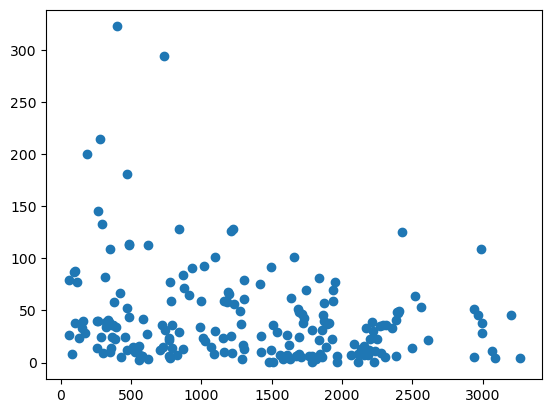

In [60]:
plt.scatter(gradient_data['x_con'],gradient_data['G_abs'])

Text(0.5, 1.0, 'Q-Q plot')

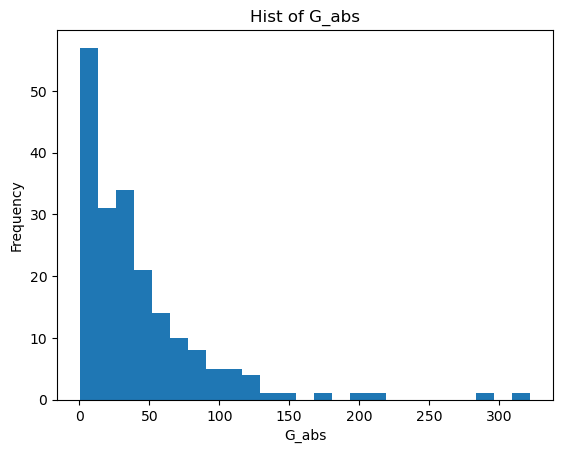

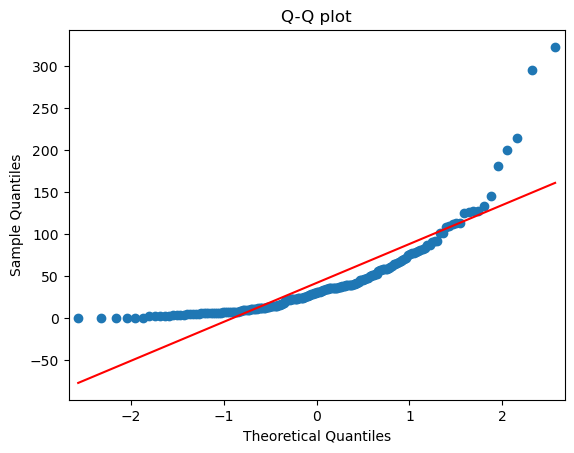

In [61]:
plt.hist((gradient_data['G_abs']), bins=25)
plt.title('Hist of G_abs')
plt.xlabel('G_abs')
plt.ylabel('Frequency')

qqplot((gradient_data['G_abs']), line='s') #quantile-quantile plot
plt.title('Q-Q plot')


Normality check for log_transformed data - better

Text(0.5, 1.0, 'Log Q-Q plot')

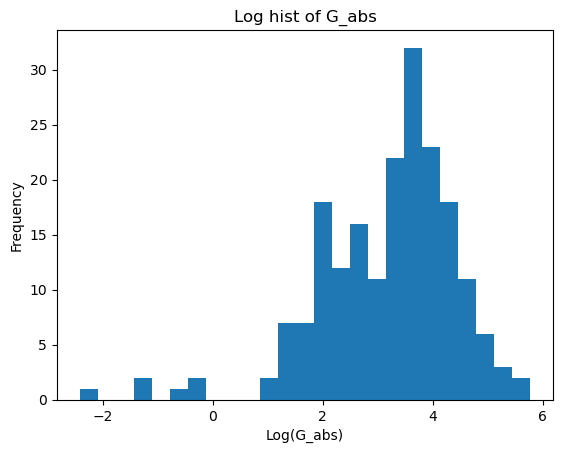

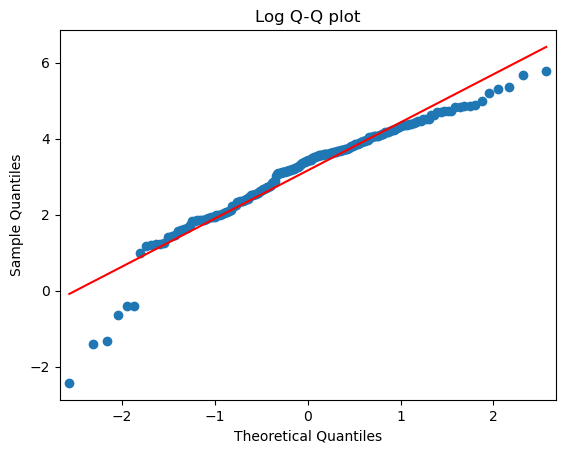

In [62]:
plt.hist(np.log(gradient_data['G_abs']), bins=25)
plt.title('Log hist of G_abs')
plt.xlabel('Log(G_abs)')
plt.ylabel('Frequency')

qqplot(np.log(gradient_data['G_abs']), line='s') #quantile-quantile plot
plt.title('Log Q-Q plot')


LinReg (ordinary least square) model on non-transformed data

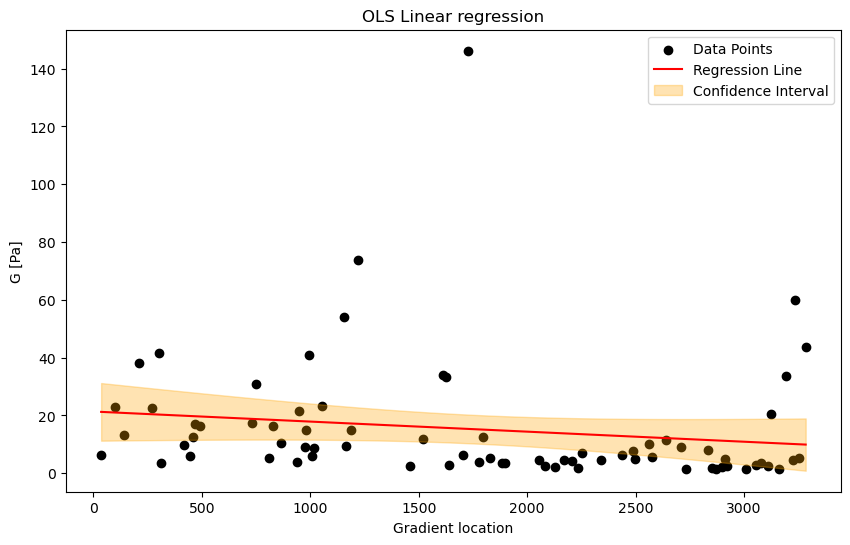

In [75]:
x= gradient_data['x_con'].values.reshape(-1,1)
y= (gradient_data['G_abs'])

#Fitting the model to the data
modelOLS = LinearRegression().fit(x,y) 

#Extracting model parameters
slopeOLS = modelOLS.coef_
interceptOLS = modelOLS.intercept_

# Generate predictions for the original data
predicted_y = modelOLS.predict(x)  # Predictions based on the original

# List of residuals: deviation of predicted data from original
residuals_OLS = y - predicted_y

# RSS: sum of squared residuals
rss = np.sum(residuals_OLS ** 2)           
# Degrees of freedom: sample size - number of parameters to estimate (intercept & slope)
dof = len(y) - 2
# Residual standard error - quality of model to predict the data; avg distance that the observed values fall from the line
RSE = np.sqrt(rss / dof)  

# LinReg model generates predictions for the new x values
def f(x):
    return modelOLS.coef_[0] * x + modelOLS.intercept_

x_predictedOLS= np.linspace(x.min(), x.max(), 100)    # Model x-space
y_predictedOLS = f(x_predictedOLS)              # Prediction of y based on the model

# Standard error of the regression line
se = RSE * np.sqrt(1/len(y) + (x_predictedOLS.flatten() - np.mean(x.flatten()))**2 / np.sum((x.flatten() - np.mean(x.flatten()))**2))

# Calculate the confidence intervals
#critical t-value (no z-score here) bcs slope has t-distribution (quality of fit; e.g. 95% of the CIs would contain the best fit)
alpha = 0.05  # significance level alpha - For a 95% CI
# Calculate the critical t-value
t_critical_OLS = scipy.stats.t.ppf(1 - alpha / 2, dof).round(1)

ci_lower = y_predictedOLS - t_critical_OLS * se
ci_upper = y_predictedOLS + t_critical_OLS * se

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Data Points')
plt.plot(x_predictedOLS, y_predictedOLS, color='red', label='Regression Line')
plt.fill_between(x_predictedOLS.flatten(), ci_lower, ci_upper, color='orange', alpha=0.3, label='Confidence Interval')
plt.xlabel("Gradient location")
plt.ylabel("G [Pa]")
plt.title("OLS Linear regression")
plt.legend()

Normality check of OSL residuals of non-transformed data

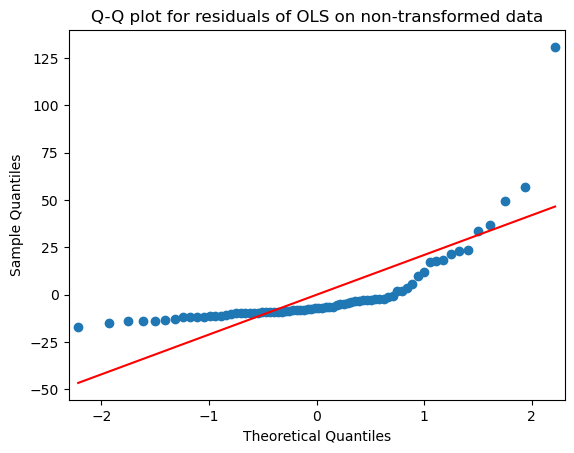

In [76]:
sm.qqplot(residuals_OLS, line='s')
plt.title("Q-Q plot for residuals of OLS on non-transformed data")
plt.show()

OLS model on log-transformed data

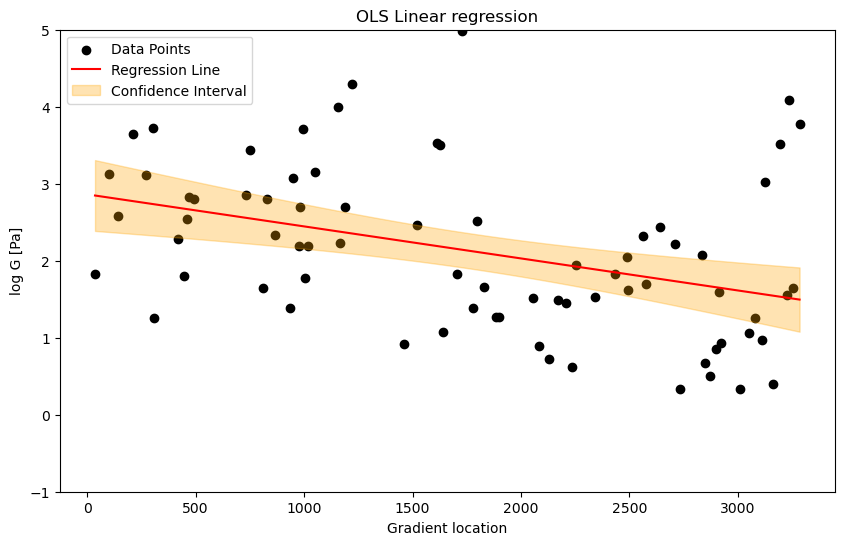

In [84]:
x= gradient_data['x_con'].values.reshape(-1,1)
y= np.log(gradient_data['G_abs'])

#Fitting the model to the data
modelOLS = LinearRegression().fit(x,y) 

#Extracting model parameters
slopeOLS = modelOLS.coef_
interceptOLS = modelOLS.intercept_

# Generate predictions for the original data
predicted_y = modelOLS.predict(x)  # Predictions based on the original

# List of residuals: deviation of predicted data from original
residuals_OLS_log = y - predicted_y

# RSS: sum of squared residuals
rss = np.sum(residuals_OLS_log ** 2)           
# Degrees of freedom: sample size - number of parameters to estimate (intercept & slope)
dof = len(y) - 2
# Residual standard error - quality of model to predict the data; avg distance that the observed values fall from the line
RSE = np.sqrt(rss / dof)  

# LinReg model generates predictions for the new x values
def f(x):
    return modelOLS.coef_[0] * x + modelOLS.intercept_

x_predictedOLS= np.linspace(x.min(), x.max(), 100)    # Model x-space
y_predictedOLS = f(x_predictedOLS)              # Prediction of y based on the model

# Standard error of the regression line
se = RSE * np.sqrt(1/len(y) + (x_predictedOLS.flatten() - np.mean(x.flatten()))**2 / np.sum((x.flatten() - np.mean(x.flatten()))**2))

# Calculate the confidence intervals
#critical t-value (no z-score here) bcs slope has t-distribution (quality of fit; e.g. 95% of the CIs would contain the best fit)
alpha = 0.05  # significance level alpha - For a 95% CI
# Calculate the critical t-value
t_critical_OLS = scipy.stats.t.ppf(1 - alpha / 2, dof).round(1)

ci_lower = y_predictedOLS - t_critical_OLS * se
ci_upper = y_predictedOLS + t_critical_OLS * se

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Data Points')
plt.plot(x_predictedOLS, y_predictedOLS, color='red', label='Regression Line')
plt.fill_between(x_predictedOLS.flatten(), ci_lower, ci_upper, color='orange', alpha=0.3, label='Confidence Interval')
plt.xlabel("Gradient location")
plt.ylabel("log G [Pa]")
plt.title("OLS Linear regression")
plt.ylim(-1,5)

plt.legend()

OLS residuals for log-transformed data

Text(0.5, 1.0, 'OLS plot for residuals from OSL model on log-transformed data')

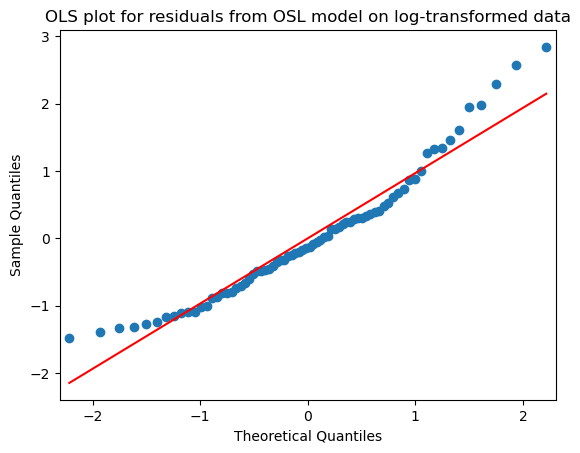

In [79]:
sm.qqplot(residuals_OLS_log, line='s')
plt.title("OLS plot for residuals from OSL model on log-transformed data")

GLS because individual variation in data is not independent

                            GLS Regression Results                            
Dep. Variable:                  G_abs   R-squared:                       0.153
Model:                            GLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     13.05
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           0.000558
Time:                        13:23:51   Log-Likelihood:                -102.66
No. Observations:                  74   AIC:                             209.3
Df Residuals:                      72   BIC:                             213.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8618      0.234     12.255      0.0

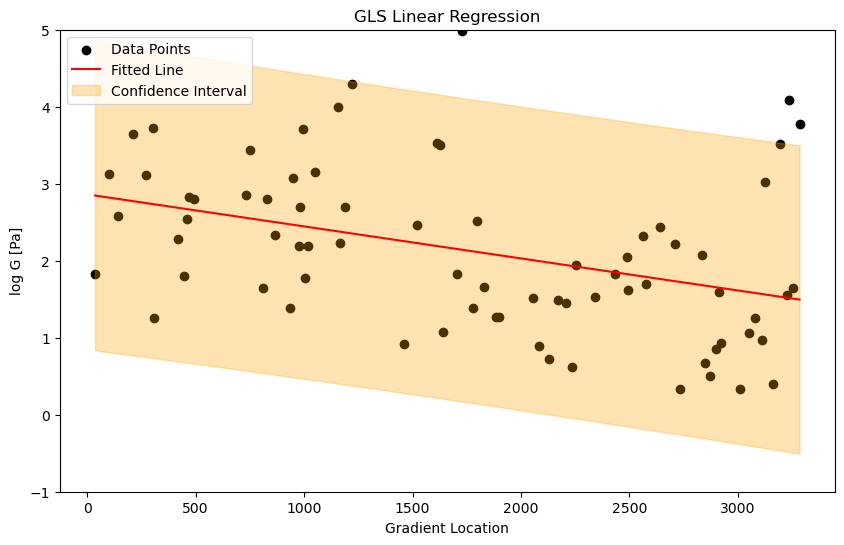

In [83]:
import statsmodels.api as sm

x= gradient_data['x_con'].values.reshape(-1,1)
y= np.log(gradient_data['G_abs'])

# Fit GLS model
x_const = sm.add_constant(x)  # adds a column of ones to independent variable - allows to estimate the intercept
 
#Fitting the model to the data
modelGLS = sm.GLS(y,x_const)

#Model parameters
resultsGSL = modelGLS.fit()
print(resultsGSL.summary())

#CI
confidence_intervals = resultsGSL.conf_int(alpha=0.05)

# Generate predictions for the original data
x_predictedGLS = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)  # Model x-space
x_predictedGLS_with_const = sm.add_constant(x_predictedGLS)  # Add constant for predictions

# Prediction of y based on the model
y_predictedGLS = resultsGSL.predict(x_predictedGLS_with_const)  # Get predictions

# CI for the predictions
predictions = resultsGSL.get_prediction(x_predictedGLS_with_const)
pred_summary = predictions.summary_frame(alpha=alpha)  #

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Data Points')  # Original data points
plt.plot(x_predictedGLS, y_predictedGLS, color='red', label='Fitted Line')  # Fitted line
plt.fill_between(x_predictedGLS.flatten(), pred_summary['obs_ci_lower'], pred_summary['obs_ci_upper'],
                 color='orange', alpha=0.3, label='Confidence Interval')
plt.xlabel("Gradient Location")
plt.ylabel("log G [Pa]")
plt.title("GLS Linear Regression")
plt.legend()
plt.ylim(-1,5)

print(resultsGSL.bse)


OLS: t-statistic evaluation & p-value

In [85]:
#slope standard error
SE_slope = np.sqrt(rss / (dof* np.sum((x.flatten() - np.mean(x.flatten()))**2))) 

#t-statistic
t_statistic_OLS = (slopeOLS / SE_slope).round(1)

print(f"Estimated slope: {slopeOLS:}")
print(f"Standard error of the slope: {SE_slope}")
print(f"t-statistic: {t_statistic_OLS[0]}")
print(f"Critical t-value: ±{t_critical_OLS}")

p_value_OLS = (1 - scipy.stats.t.cdf(np.abs(t_statistic_OLS), df=dof))[0].round(9)  # One-tailed test (with location the G goes down)

if abs(t_statistic_OLS) > t_critical_OLS:   
    print(f"OLS: There is sufficient evidence to suggest that the slope is different from zero and Y and X are not independent, since: abs value of t-statistic of intercept = {abs(t_statistic_OLS)[0]} is larger than the t-critical of intercept = {t_critical_OLS}")

if p_value_OLS < alpha:
    print(f"OLS: There is sufficient evidence to suggest that the slope coefficient is statistically significant; p-value = {p_value_OLS}")

Estimated slope: [-0.00041607]
Standard error of the slope: 0.00011516829618476003
t-statistic: -3.6
Critical t-value: ±2.0
OLS: There is sufficient evidence to suggest that the slope is different from zero and Y and X are not independent, since: abs value of t-statistic of intercept = 3.6 is larger than the t-critical of intercept = 2.0
OLS: There is sufficient evidence to suggest that the slope coefficient is statistically significant; p-value = 0.000290527


GLS: t-statistic evaluation & p-value

In [86]:
alpha = 0.05  # significance level
n = len(x)  # no of observations
k = len(resultsGSL.params)  # no of parameters (including intercept)

print(f"GLS:")
print(f"Estimated slope: {resultsGSL.params[1]}")
print(f"Standard error of the slope: {resultsGSL.bse[1]}")
print(f"t-statistic: {t_statistic_OLS[0]}")
print(f"Critical t-value: ±{t_critical_OLS}")

# Degrees of freedom
dof = n - k

# t-critical value
t_critical_GSL = scipy.stats.t.ppf(1 - alpha / 2, dof).round(1)

# t-statistics
slope_t_stat_GSL = resultsGSL.tvalues[1].round(1)
slope_p_value_GLS = resultsGSL.pvalues[1].round(9)

if abs(slope_t_stat_GSL) > t_critical_GSL:
    print(f"GLS: There is sufficient evidence to suggest that the slope is different from zero and Y and X are not independent, since: t-statistic of intercept = {abs(slope_t_stat_GSL)} is larger than the t-critical of intercept = {t_critical_GSL}")

if slope_p_value_GLS < alpha:
    print(f"GLS: There is sufficient evidence to suggest that the slope coefficient is statistically significant; p-value = {slope_p_value_GLS}")



GLS:
Estimated slope: -0.00041606821101558686
Standard error of the slope: 0.00011516829618476006
t-statistic: -3.6
Critical t-value: ±2.0
GLS: There is sufficient evidence to suggest that the slope is different from zero and Y and X are not independent, since: t-statistic of intercept = 3.6 is larger than the t-critical of intercept = 2.0
GLS: There is sufficient evidence to suggest that the slope coefficient is statistically significant; p-value = 0.000557507


Linear regresion on the data with seaborn regplot (HUOM! data not normally distributed)

<Axes: xlabel='location', ylabel='G_abs'>

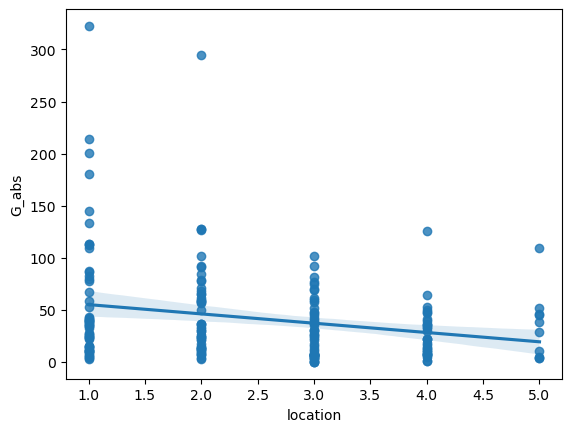

In [71]:
x= gradient_data['location']
y= gradient_data['G_abs']
sns.regplot(x=gradient_data['location'], y=gradient_data['G_abs'])